# Visual Progress of my Thesis

___

As I began 2018, I was tasked with the goal of completing my Master's thesis. At first my aim was to be finished by August, then September, then October, then November. Finally, December 18th I submitted my thesis to the library and successfully completed the requirements to achieve a MSc of Science in Mathematics. 

In Janurary I began to focus all of my time on research. We had decided on a topic concerning Kochen-Specker sets the summer prior. After two months of meetings, diving deeper and deeper into quantum physics (which I had limited experience with), I found myself struggling to keep up. My supervisor suggested I begin to write all my definitions and results in one place, a single reference point. Thus I began to write what would eventually become my thesis in April. 

Again at the suggestion of my advisor, I created a new draft each day to reduce the chance of losing work/writings accidentally. A year later, sitting here after my thesis with time to kill (I promise I am looking for work) I find myself staring at over 50 drafts with increasing size and credability. I have been increasingly interested in data science and so it seems obvious to visualize the data in a small project. Below I will compare the **number of words** in each draft with the **date** it was created. Once I have a visual representation of my work, I will compare the dates with meetings and notes in my notebooks for significant days regarding research (such as meetings/edits/due dates).

So sit back, relax, and enjoy the following presentation as we visually explore my process (and struggle) of writing a thesis over 12 months.
___

**Disclaimer:** I know that word count does not a thesis make. However, it is a metric of hours spent that I do have the data for. This presentation will not detail the hours (if not days) spent coding, but much of this was done in the very beginning. Therefore, the reader may assume that the amount of coding is comparable to the horizontal reflection of the graph below.

---

The following cell is the raw data I collected the word count (thankfully not by hand) of each draft in an array called $wc$. Along with $wc$, I have also initialized arrays containing the corresponding dates ( $dts$ ) and interesting notes from my meetings ( $nts$ ).

In [139]:
wc = [  7778,  8748,  8297,  8491,  8494,  8584,  8836,  9372, 
        9306,  9631,  9641,  9868, 13719, 14369, 12859, 13252, 
       13335, 13519, 13717, 14028, 14758, 15113, 15053, 15167, 
       15637, 15781, 15673, 15502, 15509, 15581, 15847, 16304, 
       16652, 16579, 13558, 13754, 13611, 16138, 15798, 15763, 
       16008, 16270, 17214, 17176, 17448, 17585, 17239, 17637, 
       17009, 17403, 17364, 17364, 17936, 17748, 17430, 17549 
     ]

dts = [ ( 4,17,18), ( 4,18,18), ( 4,23,18), ( 5, 7,18), ( 5,22,18), ( 5,23,18), ( 5,26,18), ( 5,29,18),
        ( 6, 2,18), ( 6, 3,18), ( 6, 4,18), ( 6,11,18), ( 6,13,18), ( 6,21,18), ( 6,24,18), ( 6,29,18), 
        ( 7, 2,18), ( 7, 3,18), ( 7,17,18), ( 7,19,18), ( 7,23,18), ( 7,24,18), ( 7,26,18), ( 7,27,18), 
        ( 7,28,18), ( 7,31,18), ( 8, 6,18), ( 8, 9,18), ( 8,11,18), ( 8,14,18), ( 8,16,18), ( 8,17,18), 
        ( 8,19,18), ( 8,20,18), ( 8,30,18), ( 9, 1,18), ( 9, 4,18), ( 9, 5,18), ( 9, 9,18), ( 9,12,18), 
        ( 9,16,18), ( 9,26,18), (10, 3,18), (10,30,18), (10,31,18), (11, 5,18), (11, 6,18), (11,13,18), 
        (11,15,18), (11,16,18), (11,21,18), (11,21,18), (11,22,18), (11,24,18), (12,10,18), (12,17,18)
      ]

nts = [ "First draft", "", "", "", "", "", "", "", 
        "", "", "", "", "", "Big cut #1", "", "", 
        "", "", "", "", "", "", "", "", 
        "", "", "", "", "", "", "", "",
        "", "", "Big cut #2", "", "", "Introduced thesis template", "", "",
        "", "", "", "Interview 10/26/18", "", "", "", "",
        "", "", "", "", "", "", "Before defence", "Final version"
      ]


While inputting the data (specifically the dates), I made the mistake of formatting them in a way not recognizable by Python (at least in the form above). The following procedure fixes this by creating a new array with the correctly formatted dates.
___
Importing the package "dates" from MatPlotLib, Python is able to consider a date as an object rather than a tuple. This will help with the graphing. 

In [140]:
import datetime
import matplotlib.dates as mdates

def create_dates(arr):
    l = len(arr)
    dates = []
    for i in range(l):
        m = arr[i][0]
        d = arr[i][1]
        dates.append(datetime.datetime(2018, m, d))
    return dates

dates = create_dates(dts)

monthsFmt = mdates.DateFormatter('%D')

Now I can focus on the fun part, visualization. Using "MatPlotLib" in Python, I will plot **Word Count vs Date** and highlight important/interesting dates. 

In [169]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.set_title("Process of a Master's Thesis (by word count)", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.grid(b=None, axis='both', linestyle='--')
ax.set_ylabel('Number of Words', size=14)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.xaxis.set_major_formatter(monthsFmt)

Since green is one of my favourite colours, thats the colour of the progression line.

In [170]:
ax.plot(dates, wc, color="green", linewidth=3)
None

We will also add notes of significant meetings and their dates on the graph.

In [171]:
count = 0
for note in nts:
    if note != "":
        y_val = 0.04+((wc[count]-min(wc))/(max(wc)-min(wc)))/1.095
        
        if note == "Introduced thesis template":
            plt.text(dates[count-3], 10000*y_val+10100, note, horizontalalignment='left', size=12, rotation=25)
        elif note == "Before defence":
            plt.text(dates[count], 10000*y_val+7750, note, horizontalalignment='center', size=12)
        elif note == "Interview 10/26/18":
            plt.text(dates[count], 10000*y_val+7750, note, horizontalalignment='right', size=12)
        elif note != "Big cut #2":
            plt.text(dates[count], 10000*y_val+8800, note, horizontalalignment='center', size=12)
        else:
            plt.text(dates[count], 10000*y_val+7500, note, horizontalalignment='center', size=12)
            
    count += 1
#The actual graph is displayed between 0.04 and 0.95

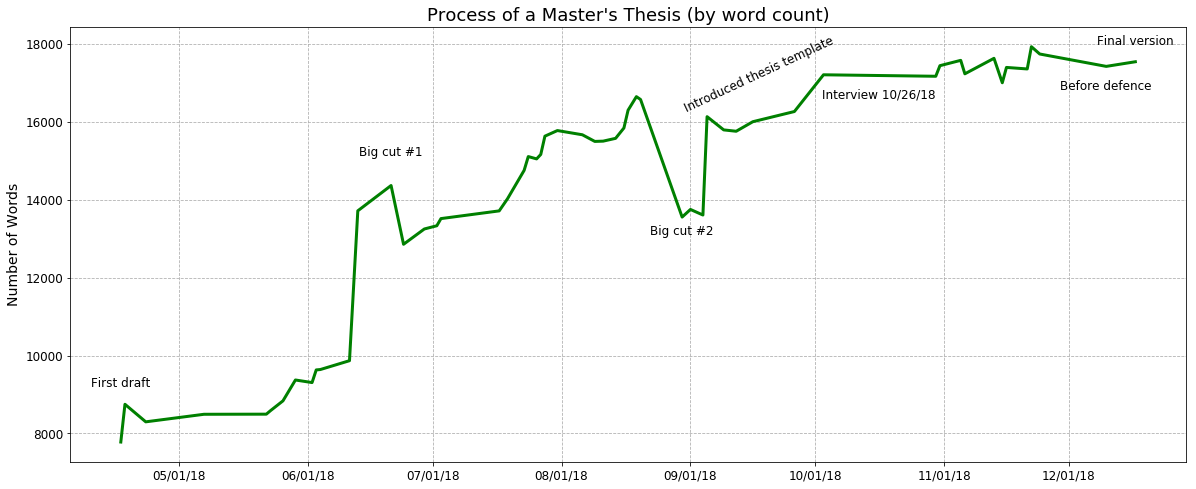

In [172]:
plt.show()

Some things seem to pop out at us now that we have plotted the data above. 

1. June 11th-13th I wrote everything I could think of
2. August 30th was a sad day in terms of word fatalities
3. My interview took priority for about a month

Additionally, it looks as if June was my most productive month, in terms of word count alone. We can check this by calculating the net number of words added or subtracted each month.

In [173]:
import calendar

def wordsPerMonth(dates,wc):
    l = len(dates)
    words_month = {}
    m1 = dates[0].month
    i1 = 0
    i2 = 1
    while i2 < l:
        m2 = dates[i2].month
        if m1 != m2:
            words_month[calendar.month_name[m1]] = wc[i2-1] - wc[i1]
            m1 = m2
            i1 = i2
        i2+=1
    words_month[calendar.month_name[m1]] = wc[i2-1] - wc[i1]
    return words_month

In [174]:
wrd_diff_month = wordsPerMonth(dates, wc)
print(wrd_diff_month)

{'April': 519, 'May': 881, 'June': 3946, 'July': 2446, 'August': -2115, 'September': 2516, 'October': 234, 'November': 163, 'December': 119}


Also, as we would expect, the last few months had little change in number of words. In fact most of the work done at this time consisted of refining and tinkering with wording.

---

The last step is to plot this in a visual way to really grasp how many words I wrote in the beginning, as well as the number of cuts I made in the following months.

In [175]:
def dict2Lists(d):
    x,y = [],[]
    for key in d:
        y.append(d[key])
        x.append(key)
    return x,y

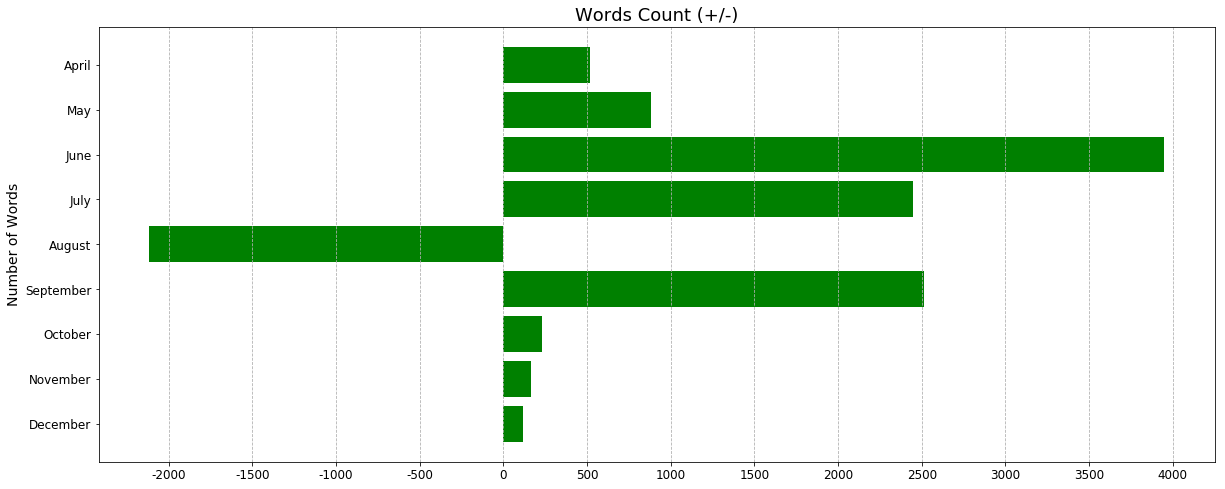

In [180]:
fig1 = plt.figure(figsize=(20,8))
ax1 = fig1.add_subplot(111)

ax1.set_title("Words Count (+/-)", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.grid(b=None, axis='x', linestyle='--')
ax1.set_ylabel('Number of Words', size=14)

ax.xaxis.set_major_formatter(monthsFmt)

mnth,wrds = dict2Lists(wrd_diff_month)

plt.barh(range(len(mnth)), list(map(float,wrds))[::-1], align='center',color='green')
plt.xticks( range(-2000,4500,500), ('-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000') )
plt.yticks(range(len(mnth)), mnth[::-1])

plt.show()

Two things come to mind looking at this. Wow August was a rough month...and I bounce back quick! September was my second best month for adding words to my thesis. 

---
## Conclusion
---


All-in-all this thesis was an investment of time and effort that, when it was completed, felt like a true accomplishment. I am proud of the work my supervisor (Dr. Petr Lisonek) and I have done. Seeing the months of work laid out infront of my eyes has me grinning, thinking back of April 17th, June 11th to 13th and, of course, December 18th. 

I hope you enjoyed following the ups and downs as I wrote my thesis. In hindsight, I wish I had taken better notes in our meetings so that I could highlight additional important dates. If I ever write another thesis, I might consider doing this ahead of time and prepare my notes accordingly. Check back in a few years to find out if I put myself through the stress of a second thesis.

